<h1>B09705039_劉惟恩_HW12

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import math
import statistics
from statsmodels.tsa.api import Holt

In [2]:
df1 = pd.read_excel('Xr20-01.xlsx')
df1.columns = [c.replace(' ', '_') for c in df1.columns]
n = df1["Time_series"].size
df1['time'] = range(1,n + 1)

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Time_series,time
0,48,1
1,41,2
2,37,3
3,32,4
4,36,5


Tail of dataset:


,Time_series,time
7,52,8
8,60,9
9,48,10
10,41,11
11,30,12


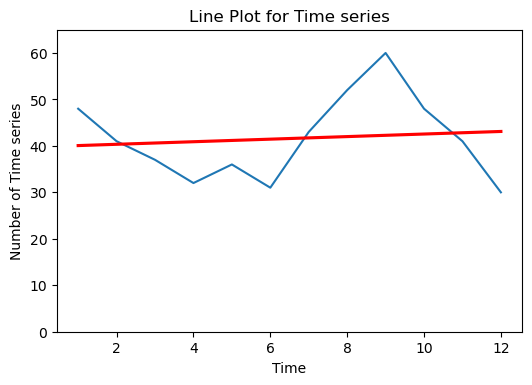

In [3]:
plt.plot(df1['time'], df1['Time_series'])
sns.regplot(x = df1['time'], y = df1['Time_series'], data = df1, color = 'r', ci = None, scatter = False)
plt.title('Line Plot for Time series')
plt.ylim(0, max(df1['Time_series'])+5)
plt.xlabel('Time')
plt.ylabel('Number of Time series')
plt.show()

<h2>Problem 1

<h3>Using Xr20-01 to forecast the next period by 3-MA and ES(0.8).

<h3>3-MA

,time,orig,ma_forecast
0,1.0,48.0,NaN
1,2.0,41.0,NaN
2,3.0,37.0,NaN
3,4.0,32.0,42.000000
4,5.0,36.0,36.666667
5,6.0,31.0,35.000000
6,7.0,43.0,33.000000
7,8.0,52.0,36.666667
8,9.0,60.0,42.000000
9,10.0,48.0,51.666667


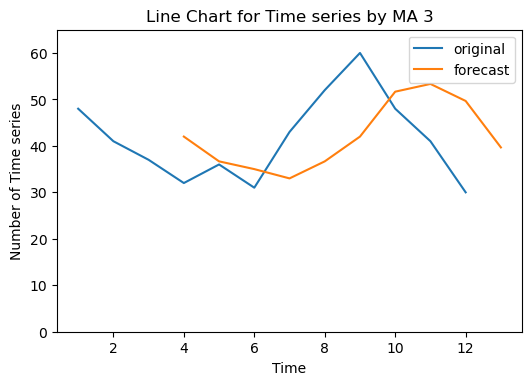

In [4]:
def MAF(y_v, p):
    ma_p_a = np.zeros(len(y_v) + 1)
    ma_p_a[:] = np.nan
    mvlen = p
    for i in range(mvlen, len(y_v) + 1):
        ma_p_a[i] = np.mean(y_v[i-mvlen: i])
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = np.append(y_v, [np.nan])
    ma_df_p = pd.DataFrame({'time':t1, 'orig': org_data, 'ma_forecast': ma_p_a})
    return {"ma_forecast":ma_df_p}

ma03_result = MAF(df1['Time_series'], 3)
ma03_result_df = []
ma03_result_df = pd.DataFrame(ma03_result['ma_forecast'])
display(ma03_result_df)
#df1["ma_forecast"] = ma03_result_df["ma_forecast"]

plt.plot(ma03_result_df['time'], ma03_result_df['orig'])
plt.plot(ma03_result_df['time'], ma03_result_df['ma_forecast'])
plt.ylim(0, max(df1['Time_series'])+5)
plt.legend(labels=['original', 'forecast'])
plt.title('Line Chart for Time series by MA 3')
plt.xlabel('Time')
plt.ylabel('Number of Time series')
plt.show()

#display(df1)

According to the result above, the forecast of next period is 39.666667 by 3-MA.

<h3>ES(0.8)

,time,orig,es_forecast
0,1.0,48.0,48.000000
1,2.0,41.0,48.000000
2,3.0,37.0,42.400000
3,4.0,32.0,38.080000
4,5.0,36.0,33.216000
5,6.0,31.0,35.443200
6,7.0,43.0,31.888640
7,8.0,52.0,40.777728
8,9.0,60.0,49.755546
9,10.0,48.0,57.951109


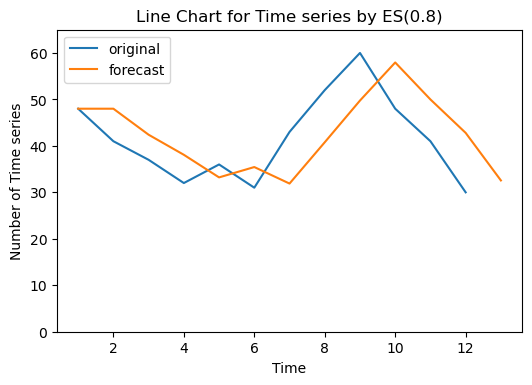

In [5]:
def ExSm(y_v, a):
    es_df = pd.DataFrame({'orig': y_v})
    es_df['es_res'] = es_df['orig'].ewm(alpha = a, adjust= False).mean()
    es_al_a = np.zeros(len(y_v) + 1)
    es_al_a[0] = es_df['es_res'][0]
    es_al_a[1] = es_df['es_res'][0]
    for i in range(2, len(y_v) + 1):
        es_al_a[i] = es_df['es_res'][i-1]
    t1 = range(0, len(y_v) + 1) + np.ones((len(y_v) + 1))
    org_data = y_v.tolist()
    es_df_e = pd.DataFrame({'time':t1, 'orig': np.array(org_data + [float('nan')]), 'es_forecast': es_al_a})
    return {"es_forecast":es_df_e}

es08_result = ExSm(df1['Time_series'], 0.8)
es08_result_df = []
es08_result_df = pd.DataFrame(es08_result['es_forecast'])
display(es08_result_df)
#df1["es_forecast"] = es08_result_df["es_forecast"]

plt.plot(es08_result_df['time'], es08_result_df['orig'])
plt.plot(es08_result_df['time'], es08_result_df['es_forecast'])
plt.ylim(0, max(df1['Time_series'])+5)
plt.legend(labels=['original', 'forecast'])
plt.title('Line Chart for Time series by ES(0.8)')
plt.xlabel('Time')
plt.ylabel('Number of Time series')
plt.show()

#display(df1)

According to the result above, the forecast of next period is 32.559609 by ES(0.8).

<h2>Problem 2

<h3>Apply EST with a = 0.8 and b = 0.2 to (F0 = Y0 = 48, ET0 = 1) forecast the next period by using Xr20-01.

,time,orig,esm_forecast
0,0,49.0,49.000000
1,1,48.0,49.000000
2,2,41.0,49.040000
3,3,37.0,42.161600
4,4,32.0,36.760064
5,5,36.0,30.918147
6,6,31.0,33.762860
7,7,43.0,29.889745
8,8,52.0,40.812763
9,9,60.0,51.987324


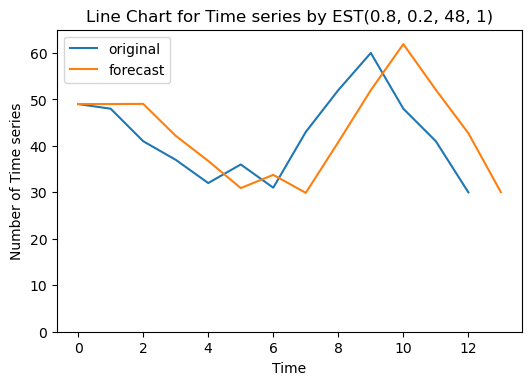

In [6]:
def ESM(y_v, a, b, f0, t0, p):
    esm_a = np.array(y_v)
    esm_model = Holt(esm_a, initialization_method='known', initial_level = f0, initial_trend = t0).fit(smoothing_level=a, smoothing_trend=b, optimized=False)
    esm_fit = esm_model.fittedvalues
    esm_fcast = esm_model.forecast(p)
    esm_ab_a = np.zeros(len(y_v) + p + 1)
    esm_ab_a[0] = f0 + t0
    for i in range(1, len(y_v) + 1):
        esm_ab_a[i] = esm_fit[i-1]
    for i in range(len(y_v) + 1, len(y_v) + p + 1):
        esm_ab_a[i] = esm_fcast[i-len(y_v)-1]
    t1 = range(0, len(y_v) + p + 1)
    Ini_v = f0 + t0
    W_ini_v = np.append(Ini_v, y_v)
    org_data = np.append(W_ini_v, [np.nan]*p)
    wsm_df_ab = pd.DataFrame({'time':t1, 'orig': org_data, 'esm_forecast': esm_ab_a})
    return {"esm_forecast":wsm_df_ab}

esm_ab_result = ESM(df1['Time_series'], 0.8, 0.2, 48, 1, 1)
esm_ab_result_df = []
esm_ab_result_df = pd.DataFrame(esm_ab_result['esm_forecast'])
display(esm_ab_result_df)

#esm = np.array(esm_ab_result_df["esm_forecast"].iloc[1:-1])
#df1["est_forecast"] = esm

plt.plot(esm_ab_result_df['time'], esm_ab_result_df['orig'])
plt.plot(esm_ab_result_df['time'], esm_ab_result_df['esm_forecast'])
plt.ylim(0, max(df1['Time_series'])+5)
plt.legend(labels=['original', 'forecast'])
plt.title('Line Chart for Time series by EST(0.8, 0.2, 48, 1)')
plt.xlabel('Time')
plt.ylabel('Number of Time series')
plt.show()

#display(df1)

According to the result above, the forecast of next period is 30.021028 by EST.

<h2>Problem 3

<h3>For Xr20-01: (1) 3-MA, (2) ES(0.8) and (3) EST (0.8, 0.2). Compare three results by MSE, MAD, and MAPE.

In [7]:
def ErrMetrix(y_v, f_v):
    y_v_n = pd.DataFrame({'orig': y_v})
    f_v_n = pd.DataFrame({'forecast': f_v})
    err1 = (y_v_n['orig'] - f_v_n['forecast']).dropna().values
    err1p = ((y_v_n['orig'] - f_v_n['forecast'])/ y_v_n['orig']).dropna().values
    MAD = round(np.absolute(err1).mean(),6)
    MSE = round(np.mean(err1 * err1),6)
    RMSE = round(np.sqrt(np.mean(err1 * err1)),6)
    MAPE = round(np.absolute(err1p).mean() * 100, 6)
    print("MAD = ", MAD)
    print("MSE = ", MSE)
    print("RMSE = ", RMSE)
    print("MAPE = ", MAPE, "%")
    return MAD, MSE, RMSE, MAPE

f_p = len(df1['Time_series'])
orig_result_a = np.array(ma03_result_df['orig'][3:f_p])
ma03_result_a = np.array(ma03_result_df['ma_forecast'][3:f_p])
es02_result_a = np.array(es08_result_df['es_forecast'][3:f_p])
esm_ab_result_a = np.array(esm_ab_result_df['esm_forecast'][4:f_p+1])
print('Error Metrics for Moving Average with n = 3')
MA03_Err_M = ErrMetrix(orig_result_a, ma03_result_a)
print('\n')
print('Error Metrics for Exponential Smoothing with alpha = 0.8')
ES02_Err_M = ErrMetrix(orig_result_a, es02_result_a)
print('\n')
print('Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2')
ESMAB_Err_M = ErrMetrix(orig_result_a, esm_ab_result_a)

ErrM_id = ['MAD', 'MSE', 'RMSE', 'MAPE']
ch20_ts1_ErrM_a = np.array([ErrM_id, MA03_Err_M, ES02_Err_M, ESMAB_Err_M])
ch20_ts1_ErrM_df = pd.DataFrame(ch20_ts1_ErrM_a.T, columns = ['ErrM', '3-MA', 'ES(0.8)', 'EST (0.8, 0.2)'])

print('dataset:')
display(ch20_ts1_ErrM_df)

Error Metrics for Moving Average with n = 3
MAD =  10.407407
MSE =  147.54321
RMSE =  12.146737
MAPE =  25.780424 %


Error Metrics for Exponential Smoothing with alpha = 0.8
MAD =  8.624962
MSE =  84.716471
RMSE =  9.204155
MAPE =  21.208999 %


Error Metrics for Holts Exponential Smoothing with alpha = 0.8 and beta = 0.2
MAD =  9.178535
MSE =  99.443016
RMSE =  9.972112
MAPE =  22.402976 %
dataset:


,ErrM,3-MA,ES(0.8),"EST (0.8, 0.2)"
0,MAD,10.407407,8.624962,9.178535
1,MSE,147.54321,84.716471,99.443016
2,RMSE,12.146737,9.204155,9.972112
3,MAPE,25.780424,21.208999,22.402976


According to the results above,<br>
MSE : ES(0.8) < EST (0.8, 0.2) < 3-MA<br>
MAD : ES(0.8) < EST (0.8, 0.2) < 3-MA<br>
MAPE : ES(0.8) < EST (0.8, 0.2) < 3-MA.

Thus, the best forecast method for the long-term trend of this time series is Exponential Smoothing with alpha = 0.8.